In [57]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image

SEGMENTED_FILE = '../data/interim/LINES KHALIL/segment_no_3_expl.jpg'

In [58]:
def shear(img, m=-0.5):
    width, height = img.size
    xshift = abs(m)*width/20
    new_width = width + int(round(xshift))
    img = img.transform((new_width, height), Image.AFFINE,
            (1, m, -xshift if m > 0 else 0, 0, 1, 0), Image.BICUBIC)
    return(np.array(img)[:, 20:-20])

In [59]:
image_proportion = cv2.imread(SEGMENTED_FILE)
image_proportion = cv2.cvtColor(image_proportion, cv2.COLOR_RGB2GRAY)

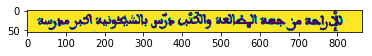

In [60]:
plt.imshow(image_proportion)

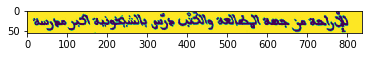

In [67]:
image_proportion = shear(Image.fromarray(image_proportion), -0.3)
plt.imshow(image_proportion)

In [68]:
hist = 255-image_proportion.mean(axis=0)
interruption = hist > 20

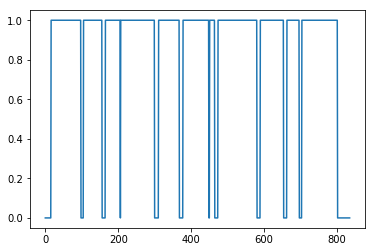

In [69]:
plt.plot(interruption)

In [70]:
mask = image_proportion * interruption

In [71]:
fg = cv2.bitwise_or(image_proportion, image_proportion, mask=mask)

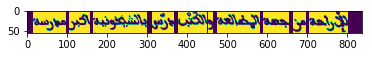

In [72]:
plt.imshow(fg)

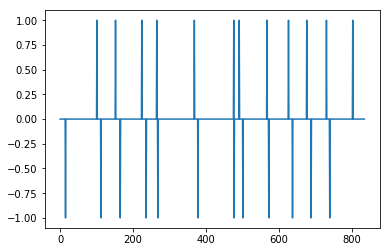

In [21]:
filter = np.array([-1, 1])
conv = np.convolve(interruption, filter)
plt.plot(conv)